<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)


# Data Gathering

In [11]:
df = pd.read_csv("car_dataset.csv")

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [13]:
df.shape

(301, 9)

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [15]:
df['car_age'] = 2022-df.Year

In [16]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [17]:
df.Car_Name.value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [18]:
df.drop(columns=['Car_Name','Year'], inplace=True)

In [19]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [20]:
df.Owner.value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [21]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


# Data Preparation

# Feature Engineering

In [22]:
df=pd.get_dummies(df, drop_first=True)

In [23]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [24]:
X = df.drop('Selling_Price',axis=1)
y = df['Selling_Price']

### Splitting data into training and testing

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


##  Model Building (Linear Regression)

In [28]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [29]:
lm.fit(X_train,y_train)

LinearRegression()

In [30]:
y_pred = lm.predict(X_test)


In [31]:
X_test

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
177,0.57,24000,0,6,0,1,1,0
289,13.60,10980,0,6,0,1,0,1
228,9.40,60000,0,10,1,0,0,1
198,0.57,35000,1,11,0,1,1,1
60,18.61,40001,0,9,0,1,0,1
...,...,...,...,...,...,...,...,...
234,5.70,4492,0,7,0,1,0,1
296,11.60,33988,0,6,1,0,0,1
281,7.60,50456,0,16,0,1,0,1
285,8.50,15059,0,6,0,1,0,0


In [32]:
y_pred

array([ 2.95534303,  8.178939  ,  6.45427257, -1.42417501,  9.08889914,
        7.41825441,  1.33644285,  0.84027217,  1.36501949,  7.49026806,
        9.11830017,  0.58573931,  8.41612774,  3.42316502,  6.90043281,
        3.04988309,  0.48448171, 10.70970753,  1.75207005,  2.34571752,
        0.39746889,  8.11925338,  6.62469317,  2.65939066,  0.78280554,
        3.69330765,  5.24815462,  2.82676351,  2.13640446,  1.75237686,
        0.39730155,  9.11750503, -0.66188053,  2.29098014,  8.57067341,
        4.4910324 ,  7.20530369,  7.53824015,  2.89101139,  7.93588794,
        3.93585154,  4.27133211,  4.33205704,  0.6008847 ,  7.34025071,
        0.47602539,  7.29187681, 11.23125597,  3.13805132,  5.38262985,
        6.7988422 ,  2.17888955, 20.63303305, 17.0015261 ,  7.50717349,
        9.69621308,  4.47478116,  8.97377615,  1.82294639,  7.60416734,
        0.22226536])

In [33]:
lm.coef_

array([ 4.29152503e-01, -6.15725866e-06, -9.03759824e-01, -3.53801365e-01,
        2.53327258e+00,  7.38464226e-01, -1.19059291e+00, -1.63902155e+00])

In [34]:
lm.intercept_

5.4334371867157865

In [35]:
sum(X_test.loc[177] * lm.coef_) + lm.intercept_

2.955343034845746

In [36]:
!pip install yellowbrick

# Interpret the model

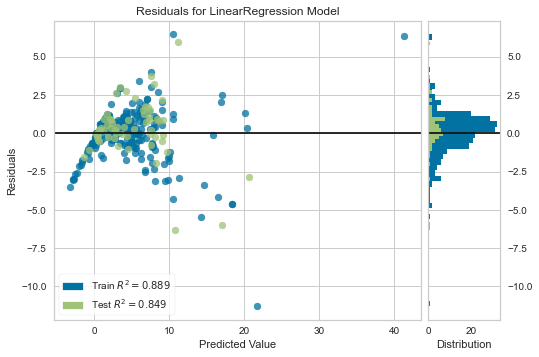

In [37]:
from yellowbrick.regressor import ResidualsPlot
# Instantiate the linear model and visualizer
lm = LinearRegression()
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

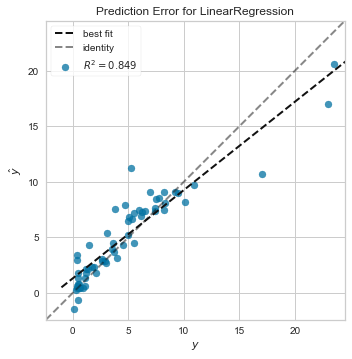

In [38]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lm = LinearRegression()
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

# Model Evaluation

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [40]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [41]:
eval_metric(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8489813024899079
MAE 		: 1.2162256821297004
MSE 		: 3.4788039706378724
RMSE 		: 1.8651552135513743


In [42]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}


In [43]:
comparing = pd.DataFrame(my_dict)
comparing

,Actual,Pred,Residual
177,0.35,2.955343,-2.605343
289,10.11,8.178939,1.931061
228,4.95,6.454273,-1.504273
198,0.15,-1.424175,1.574175
60,6.95,9.088899,-2.138899
...,...,...,...
234,5.50,4.474781,1.025219
296,9.50,8.973776,0.526224
281,2.10,1.822946,0.277054
285,7.40,7.604167,-0.204167


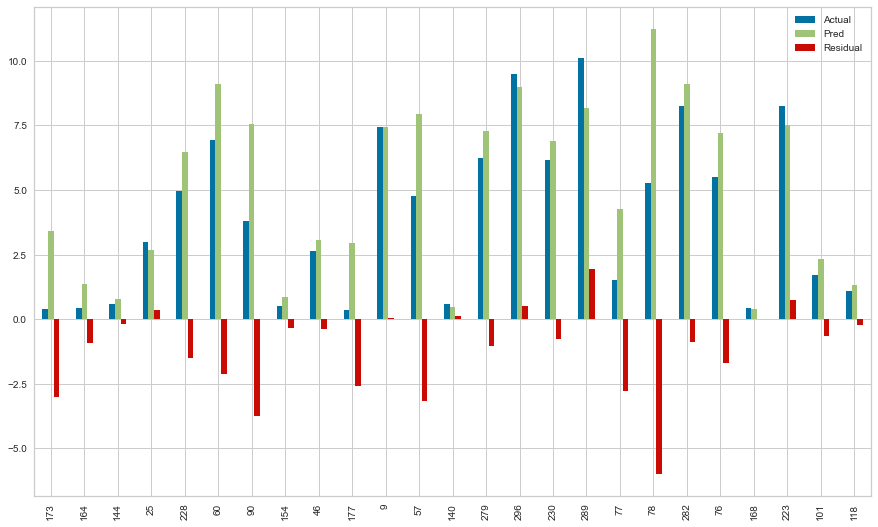

In [44]:
comparing.sample(25).plot(kind ="bar", figsize=(15,9))
plt.show()

# Regularization

# Ridge

In [45]:
from sklearn.linear_model import Ridge,RidgeCV

In [46]:
ridge_model = Ridge( random_state=42)

In [47]:
ridge_model

Ridge(random_state=42)

In [48]:
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

In [49]:
ridge_model.alpha

1.0

In [50]:
alpha_space = np.linspace(0.01,1.100)
alpha_space

array([0.01      , 0.0322449 , 0.0544898 , 0.07673469, 0.09897959,
       0.12122449, 0.14346939, 0.16571429, 0.18795918, 0.21020408,
       0.23244898, 0.25469388, 0.27693878, 0.29918367, 0.32142857,
       0.34367347, 0.36591837, 0.38816327, 0.41040816, 0.43265306,
       0.45489796, 0.47714286, 0.49938776, 0.52163265, 0.54387755,
       0.56612245, 0.58836735, 0.61061224, 0.63285714, 0.65510204,
       0.67734694, 0.69959184, 0.72183673, 0.74408163, 0.76632653,
       0.78857143, 0.81081633, 0.83306122, 0.85530612, 0.87755102,
       0.89979592, 0.92204082, 0.94428571, 0.96653061, 0.98877551,
       1.01102041, 1.03326531, 1.0555102 , 1.0777551 , 1.1       ])

In [51]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [52]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.01      , 0.0322449 , 0.0544898 , 0.07673469, 0.09897959,
       0.12122449, 0.14346939, 0.16571429, 0.18795918, 0.21020408,
       0.23244898, 0.25469388, 0.27693878, 0.29918367, 0.32142857,
       0.34367347, 0.36591837, 0.38816327, 0.41040816, 0.43265306,
       0.45489796, 0.47714286, 0.49938776, 0.52163265, 0.54387755,
       0.56612245, 0.58836735, 0.61061224, 0.63285714, 0.65510204,
       0.67734694, 0.69959184, 0.72183673, 0.74408163, 0.76632653,
       0.78857143, 0.81081633, 0.83306122, 0.85530612, 0.87755102,
       0.89979592, 0.92204082, 0.94428571, 0.96653061, 0.98877551,
       1.01102041, 1.03326531, 1.0555102 , 1.0777551 , 1.1       ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [53]:
ridge_cv_model.alpha_

0.01

In [54]:
ridge_cv_model.best_score_

-1.941061282302337

In [55]:
y_pred = ridge_cv_model.predict(X_test)
y_pred

array([ 2.95482914,  8.17908814,  6.45348799, -1.42360623,  9.08915367,
        7.41756474,  1.33667433,  0.84039303,  1.36523984,  7.4895739 ,
        9.11771239,  0.58588513,  8.41536796,  3.42265162,  6.8996671 ,
        3.04965392,  0.48454353, 10.7100985 ,  1.75232928,  2.34601164,
        0.39754212,  8.11858477,  6.62385093,  2.65897236,  0.78296611,
        3.69304089,  5.24810442,  2.8264212 ,  2.13670493,  1.75264297,
        0.39738533,  9.11700625, -0.66191784,  2.29057485,  8.57010807,
        4.49087407,  7.20547168,  7.53834003,  2.89074756,  7.93601021,
        3.93558662,  4.27033352,  4.33184198,  0.60107366,  7.33953034,
        0.47615861,  7.29198643, 11.23085172,  3.1377389 ,  5.38172714,
        6.79797355,  2.17917564, 20.63265082, 17.00076542,  7.50654215,
        9.69564716,  4.47455872,  8.97322361,  1.82244269,  7.60336992,
        0.22237024])

In [56]:
eval_metric(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.84899650583842
MAE 		: 1.2161661635391825
MSE 		: 3.4784537526182304
RMSE 		: 1.8650613267713827


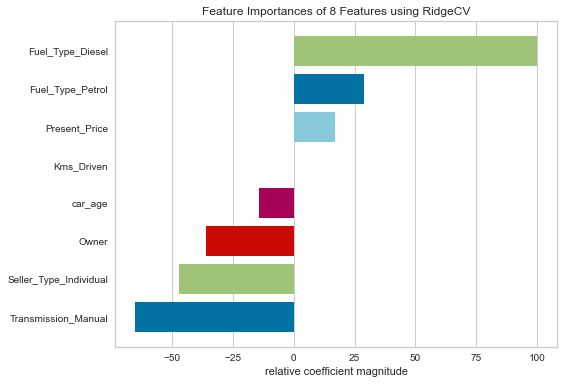

<AxesSubplot:title={'center':'Feature Importances of 8 Features using RidgeCV'}, xlabel='relative coefficient magnitude'>

In [57]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
viz = FeatureImportances(ridge_cv_model, labels=pd.DataFrame(X_train).columns)
viz.fit(X_train, y_train)
viz.show()

# Lasso

In [58]:
 from sklearn.linear_model import Lasso, LassoCV

In [59]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1, random_state=42)

In [60]:
y_pred = lasso_model.predict(X_test)

In [61]:
eval_metric(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.7985538621024054
MAE 		: 1.4714179283504274
MSE 		: 4.640429535826083
RMSE 		: 2.1541656240470655


In [62]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [63]:
lasso_cv_model.fit(X_train,y_train)
y_pred = lasso_cv_model.predict(X_test)

In [64]:
eval_metric(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8507917956242985
MAE 		: 1.2076443270465598
MSE 		: 3.437098203017212
RMSE 		: 1.8539412620191644


In [65]:
lasso_cv_model.alpha_

0.01

In [66]:
lasso_cv_model.mse_path_[-1].mean()

3.9638842268628367

## Elastic-Net 

In [67]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [68]:
elastic_model = ElasticNet(random_state=42)
elastic_model.fit(X_train, y_train)

ElasticNet(random_state=42)

In [69]:
y_pred = elastic_model.predict(X_test)

In [70]:
eval_metric(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8087884906376239
MAE 		: 1.4234255674689695
MSE 		: 4.404668885169282
RMSE 		: 2.0987303031045417


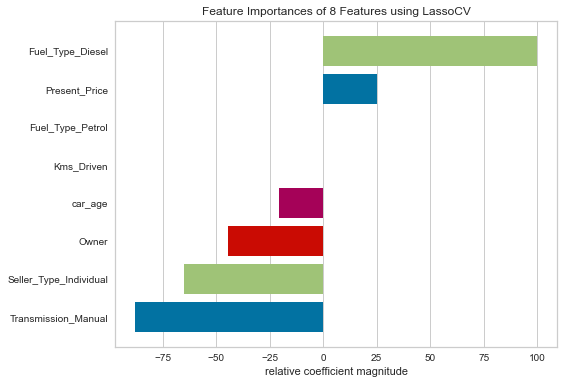

<AxesSubplot:title={'center':'Feature Importances of 8 Features using LassoCV'}, xlabel='relative coefficient magnitude'>

In [71]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
viz = FeatureImportances(lasso_cv_model, labels=pd.DataFrame(X_train).columns)
viz.fit(X_train, y_train)
viz.show()

# Final Model

In [72]:
final_model = Lasso(alpha=0.01) #lasso_cv_model

In [73]:
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
eval_metric(y_test,y_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8507917956242985
MAE 		: 1.2076443270465598
MSE 		: 3.437098203017212
RMSE 		: 1.8539412620191644
